# COGS 108 - EDA Checkpoint

# Names

- Pallavi Prabhu
- Hana Ton-Nu
- Justin Gamm
- Raquel Sanchez
- Ria Singh


# Research Question



Do students at UCSD expect higher grades than they receive if they recommend the professor, as measured through CAPEs? Namely, do students that recommend a professor generally expect to do better (expected grade) than they actually did (grade received) and vice versa?



## Background and Prior Work


CAPES stands for “Course And Professor Evaluations” and are offered to students at the end of every quarter to give feedback on their courses and the professors that taught them. As stated on the website, CAPES<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) is: 

    “a student-run organization that administers a standardized evaluation of UCSD's undergraduate courses and professors. Student feedback gauges the caliber of both the University's curriculum and its faculty. We provide students with the opinions of their peers on any particular course or professor.” (UCSD)
    
After students submit their CAPES, this data is aggregated for each quarter of evaluations into features like the percentage of students that recommended the class, the percentage of students that recommend the instructor, the number of hours per week involved in this class, the average grade expected, and the average grade received (which is calculated from the final submitted grades). CAPEs play an important role in helping students choose their professors and even the courses they enroll them in as they generally have more statistics and comprehensive data compared to other rating sites. 

In addition, other rating sites often show signs of significant skew, with a majority of ratings being either towards the extreme since people are more likely to rate something they have a strong reaction towards. This creates a bimodal distribution that lacks data in between these two strong opinions. On the other hand, while not entirely protected, CAPEs likely have some resistance to potential skews in data since students are often incentivized to complete them for extra credit, which gives equal opportunity for various kinds of responses.
In winter of 2021, a COGS108 group also asked a question regarding CAPEs: “How has remote learning during the COVID-19 pandemic affected UCSD students’ grades and learning experience?” (Group084_Wi21<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)). Thus, while the general topic remains the same, while they focus on the change of grades and learning as a result of the pandemic, we want to explore the potential association between students’ like of professors (recommended professor) and their potential overestimation/underestimation of their performance in class. While it seems obvious that students who do better in a course likely recommend a professor at a higher rate than those who don’t, we are more interested in their confidence and expectation.

Furthermore, prior studies that have explored this topic of student-professor evaluations have found evidence of gender bias where female professors tended to rank lower than their male counterparts<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). While this is not directly related to our question, the general idea remains the same and it peaked our curiousity on some of the other featurs we could include. This could also be an interesting feature to consider in our analysis: how the professors’ gender, likeability, and the students' expectation of grade vs their actual received grade are all related. Do students overestimate their ability and expect a higher grade when the professor is female? How does the gender of a professor play into their recommendation in relation to the grades received in the class? Some other features that pique interest are the difference in expectation vs received depending on the department or type of class (like STEM vs liberal arts). Based on experience and expectatioon, STEM classes are notoriously perceived as more difficult than liberal arts class. Thus, it may be interesting to explore how this perceived difficulty plays into the relationship between the difference in grades expected and received and the overall likeabilty/recommendation of a professor. 


1. <a name="cite_note-1"></a> [^](#cite_ref-1) University of California, San Diego. (n.d.). Course And Professor Evaluations. COURSE AND PROFESSOR EVALUATIONS (CAPE). Retrieved November 1, 2023, from https://cape.ucsd.edu/
2. <a name="cite_note-2"></a> [^](#cite_ref-2) FinalProject_group084. (2021, March 29). GitHub. Retrieved November 1, 2023, from https://github.com/COGS108/FinalProjects-Wi21/blob/main/FinalProject_group084.ipynb
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Mitchell, K., & Martin, J. (2018). Gender Bias in Student Evaluations. PS: Political Science & Politics, 51(3), 648-652. doi:10.1017/S104909651800001X from https://www.cambridge.org/core/journals/ps-political-science-and-politics/article/gender-bias-in-student-evaluations/1224BE475C0AE75A2C2D8553210C4E27


# Hypothesis


After thinking back on our experiences in classes at UCSD and talking to our peers, we hypothesize that students in classes of well liked professors will overestimate their grade and those in classes of professors who are not as well liked will underestimate their grade.

We expect the correlation between the recommendation percentage of a professor and the difference between the expected and received grades to be positive. Additionally we expect the difference to become negative in professors who have low recommendation percentages. 


# Data

## Data overview

- Dataset #1
  - Dataset Name: CAPES data from UCSD
  - Link to the dataset: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes/
  - Number of observations: 63363
  - Number of variables: 11


This dataset includes CAPES data from UCSD. Important variables in this dataset that drive our research include recommendation percent, expected grade, and received grade. The datatypes included in this dataset include object, int, and float. The metric in our case would be the difference between received grade and expectated grade, which we created a column to display. These variables can act as a proxy for teaching effectiveness. In order to clean up our data, we used a couple different methods; we dropped unecessary columns, we standardized the grades and percentage columns, and dropped na columns. 


## Dataset: UCSD CAPES

### Cleaning Data Process
  - Dataset is relatively clean except for 'Average Grade Recieved' column containing some NaN. We determined that the data was in a usable format because each measured variable had its own column, each observation of the measured variable was in a different row, and the column headers are descriptive of their variables.
  - We first decided to drop the evaluation url column since we did not deem it as relevant information needed to answer our question.
  - We then checked and dropped all rows with null information since we felt those with missing values would not be helpful and would make exctracting data more difficult.
  - We created a standarisation function that would convert all of the values in the 'Average Grade Expected' and 'Average Grade Received' columns to float columns and remove the '%' symbol.
  - A new column was created called 'Difference' where the difference between the 'Average Grade Received' and the 'Average Grade Expected' is stored. This will help later to determine whether students over or underestimated their grades.
  - We created columns for both the year and quarters so it has integers representing the quarters (1 = Winter, 2 = Spring, 3 = S1, 4 = S2, 5 = S3, 6 = Fall, 7 = SU) and the full year is displayed.
  - Lastly, we also the categories of 'liberal' and 'stem' for the top 100 class codes for which information could be found in order to use these two groups in our analysis.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
capes = pd.read_csv("capes_data.csv")

In [6]:
#determine number of variables and observations
capes.shape

(63363, 11)

In [7]:
capes.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Evalulation URL
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
2,Jones Ian William Nasser,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN,https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...


In [8]:
capes.dtypes

Instructor                           object
Course                               object
Quarter                              object
Total Enrolled in Course              int64
Total CAPEs Given                     int64
Percentage Recommended Class         object
Percentage Recommended Professor     object
Study Hours per Week                float64
Average Grade Expected               object
Average Grade Received               object
Evalulation URL                      object
dtype: object

In [9]:
#Dropping column as we cannot use it
capes = capes.drop(columns = ["Evalulation URL", "Instructor"])

In [10]:
#checking for NA 
capes.isna().sum()


Course                                  0
Quarter                                 0
Total Enrolled in Course                0
Total CAPEs Given                       0
Percentage Recommended Class            0
Percentage Recommended Professor        0
Study Hours per Week                    1
Average Grade Expected               1486
Average Grade Received              17628
dtype: int64

In [11]:
#Investigating if NA in grades expected and recieved are from particular quarter(covid?)
capes_na = capes[capes.isnull().any(axis=1)]
capes_na.nunique()


Course                              6028
Quarter                               87
Total Enrolled in Course             278
Total CAPEs Given                    166
Percentage Recommended Class         332
Percentage Recommended Professor     322
Study Hours per Week                 963
Average Grade Expected               155
Average Grade Received               135
dtype: int64

In [12]:
capes_na.head()

,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received
2,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN
6,ANBI 135 - Genetic Anthro Lab Techniques (A),SP23,14,9,100.0%,100.0%,5.39,A- (3.75),NaN
11,ANSC 117 - Transgenderisms (A),SP23,15,4,100.0%,100.0%,5.00,B+ (3.50),NaN
18,ANSC 156 - Mad Films (A),SP23,17,5,100.0%,100.0%,1.70,A- (3.80),NaN
19,ANSC 173 - Ethnography in Practice (A),SP23,12,7,100.0%,100.0%,3.07,A- (3.71),NaN


In [13]:
capes_na["Quarter"].unique()

array(['SP23', 'WI23', 'FA22', 'S322', 'S222', 'S122', 'SP22', 'WI22',
       'FA21', 'S321', 'S221', 'S121', 'SP21', 'WI21', 'FA20', 'S320',
       'S220', 'S120', 'SP20', 'WI20', 'FA19', 'S319', 'S219', 'S119',
       'SP19', 'WI19', 'FA18', 'S318', 'S218', 'S118', 'SP18', 'WI18',
       'FA17', 'S317', 'S217', 'S117', 'SP17', 'WI17', 'FA16', 'S316',
       'S216', 'S116', 'SP16', 'WI16', 'FA15', 'S215', 'S115', 'SP15',
       'WI15', 'FA14', 'S314', 'S214', 'S114', 'SP14', 'WI14', 'FA13',
       'S313', 'S213', 'S113', 'SP13', 'WI13', 'FA12', 'S312', 'S212',
       'S112', 'SP12', 'WI12', 'FA11', 'S311', 'S211', 'S111', 'SP11',
       'WI11', 'FA10', 'SU10', 'SP10', 'WI10', 'FA09', 'SU09', 'SP09',
       'WI09', 'FA08', 'SU08', 'SP08', 'WI08', 'FA07', 'SU07'],
      dtype=object)

In [14]:
#dropping all rows with NA as remaining dataset is still large enough and the NA rows are random
capes = capes.dropna()
capes.shape

(45393, 9)

In [15]:
#Function to make the Average Grade Expected and Average Grade Recieved into floats of just the grade point
#number
def grade_standardize(grade):
    
    #ensure grade has not been standardized
    if type(grade) == float:
        return grade
    
    #retain only part after open parenthesis
    grade = grade.split("(")[-1]
    
    #remove close parenthesis
    grade = grade.replace(")", "")
    
    #change to float
    grade = float(grade)
    
    return grade
    

In [16]:
capes["Average Grade Expected"] = capes["Average Grade Expected"].apply(grade_standardize)
capes["Average Grade Received"] = capes["Average Grade Received"].apply(grade_standardize)

In [17]:
#function to remove % symbol from Percentage Recommended Class and Percentage Recommended Professor and make
#into float

def percent_standardize(percent):
    #ensure percent has not been standardized
    if type(percent) == float:
        return percent
    
    #remove % sign
    percent = percent.replace("%", "")
    
    #convert to float
    percent = float(percent)
    
    return percent
        

In [18]:
capes["Percentage Recommended Class"] = capes["Percentage Recommended Class"].apply(percent_standardize)
capes["Percentage Recommended Professor"] = capes["Percentage Recommended Professor"].apply(percent_standardize)

In [19]:
capes.dtypes

Course                               object
Quarter                              object
Total Enrolled in Course              int64
Total CAPEs Given                     int64
Percentage Recommended Class        float64
Percentage Recommended Professor    float64
Study Hours per Week                float64
Average Grade Expected              float64
Average Grade Received              float64
dtype: object

In [20]:
#create new column called difference which is the difference between the average
#grade expected and the average grade recieved
#negative numbers in difference signify students overestimated their grade, positive number signifies students
#underestimated their grade
capes = capes.assign(Difference = capes["Average Grade Received"] - capes["Average Grade Expected"])

In [21]:
#create columns for year and terms where each year will be an int (eg. 07, 08, 23, etc) and terms will be
#denoted by numbers(see code)
#this code is taken from https://github.com/COGS108/FinalProjects-Wi21/blob/main/FinalProject_group084.ipynb

In [22]:
def extract_term(term):
    TERMS = { "WI": 1, "SP": 2, "S1": 3, "S2": 4, "S3": 5, "FA": 6, "SU" : 7}
    
    term = term[:2]
    term = TERMS[term]
    
    return term

In [23]:
def extract_year(qtr):
    
    year = qtr[2:]
    year = int("20" + year)
    
    return year




In [24]:
capes["Term"] = capes["Quarter"].apply(extract_term)
capes["Year"] = capes["Quarter"].apply(extract_year)

In [25]:
capes.head()

,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Difference,Term,Year
0,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5,100.0,2.80,3.84,3.67,-0.17,2,2023
1,AAS 170 - Legacies of Research (A),SP23,20,7,100.0,100.0,2.50,3.86,3.92,0.06,2,2023
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0,83.3,3.83,3.50,3.07,-0.43,2,2023
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0,100.0,5.17,4.00,4.00,0.00,2,2023
5,ANBI 111 - Human Evolution (A),SP23,22,4,100.0,100.0,2.50,4.00,2.95,-1.05,2,2023


In [26]:
capes.dtypes

Course                               object
Quarter                              object
Total Enrolled in Course              int64
Total CAPEs Given                     int64
Percentage Recommended Class        float64
Percentage Recommended Professor    float64
Study Hours per Week                float64
Average Grade Expected              float64
Average Grade Received              float64
Difference                          float64
Term                                  int64
Year                                  int64
dtype: object

In [27]:
capes.describe()

,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Difference,Term,Year
count,45393.000000,45393.000000,45393.000000,45393.000000,45393.000000,45393.000000,45393.000000,45393.000000,45393.000000,45393.000000
mean,99.476637,50.702047,88.010850,88.267233,5.827672,3.479624,3.271943,-0.207682,3.002401,2015.932258
std,93.293638,52.987864,12.260053,14.430897,2.346697,0.297638,0.404402,0.278231,2.049306,4.595074
min,20.000000,3.000000,0.000000,0.000000,0.500000,1.600000,0.550000,-2.240000,1.000000,2007.000000
25%,33.000000,16.000000,82.400000,83.300000,4.230000,3.280000,2.970000,-0.380000,1.000000,2012.000000
50%,63.000000,31.000000,91.100000,93.100000,5.430000,3.490000,3.280000,-0.180000,2.000000,2016.000000
75%,136.000000,67.000000,97.600000,100.000000,7.000000,3.700000,3.580000,-0.020000,6.000000,2020.000000
max,1101.000000,588.000000,100.000000,100.000000,20.330000,4.000000,4.000000,1.600000,6.000000,2023.000000


In [28]:
capes.isna().any()

Course                              False
Quarter                             False
Total Enrolled in Course            False
Total CAPEs Given                   False
Percentage Recommended Class        False
Percentage Recommended Professor    False
Study Hours per Week                False
Average Grade Expected              False
Average Grade Received              False
Difference                          False
Term                                False
Year                                False
dtype: bool

In [29]:
#getting the types of courses in the dataset for potential grouping based on STEM vs liberal
capes['Course'].apply(lambda x: x.split(' ')[0]).value_counts()

Course
MATH    3104
CSE     2312
ECON    2115
CHEM    2056
MGT     2026
        ... 
ERC        3
HIGL       3
TDCH       2
LTAF       2
JWSP       1
Name: count, Length: 125, dtype: int64

In [30]:
#categories given for the top 100 course codes
#note some classes can be considered both since they are multidiciplinary like COGS
#classes offered as both BS and CA: COGS, ESYS, HDS, SYN, ICAM
#unsure due to no information found COSF, cogn, comt, SOCC
stem_courses = ['MATH', 'CSE', 'CHEM', 'PHYS', 'MAE', 'ECE', 'BILD', 'SE', 'BENG', 'BIPN', 'BIEB', 'NANO'\
               'DSC','ENG', 'BISP', 'FPMU' ]
liberal_courses = ['ECON','POLI', 'MGT', 'PSYC', 'VIS', 'SOCI', \
                   'COGS', 'COMM', 'MUS', 'PHIL', 'SIO', 'TMDV', 'JAPN', 'CHIN', 'EDS', 'MMW', 'ETHN', 'USP', \
                   'LIGN', 'TDGE', 'ANTH', 'HIUS', 'AWP', 'LTWL', 'DOC', 'FMPH', 'HILD', 'HDP', 'INTL', \
                   'LSTP', 'HIEA', 'GLBH', 'CGS', 'WCWP', 'TDHT', 'HILA', 'ESYS', 'ANBI', 'HINE', 'COCU', \
                   'LTKO', 'LIHL', 'RELI', 'COHI', 'ENVR', 'LTCS', 'HDS', 'ANAR', 'LTLA', 'TDTR', 'HITO'\
                   'LATI', 'TDDR', 'HIAF', 'LTEU', 'TWS', 'DSGN', 'LTRU', 'TDDE', 'ELWR', 'SOCB', 'LAWS'\
                   'LTCH', 'LTIT']

In [31]:
#defining a function to add this label based on the class code
def course_cat(code):
    if code in stem_courses:
        return 'stem'
    elif code in liberal_courses:
        return 'liberal'
    else:
        return 

In [32]:
#creating a new dataframe with the categories and filtering for these classes
capes_categorized = capes
capes_categorized['Category'] = capes['Course'].apply(lambda x: x.split(' ')[0]).apply(course_cat)
capes_categorized[(capes_categorized['Category']=='liberal')|(capes_categorized['Category']=='stem')]

,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Difference,Term,Year,Category
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0,83.3,3.83,3.50,3.07,-0.43,2,2023,liberal
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0,100.0,5.17,4.00,4.00,0.00,2,2023,liberal
5,ANBI 111 - Human Evolution (A),SP23,22,4,100.0,100.0,2.50,4.00,2.95,-1.05,2,2023,liberal
7,ANBI 140 - Evolution of Human Brain (A),SP23,36,12,63.6,72.7,6.17,3.00,2.53,-0.47,2,2023,liberal
8,ANBI 173 - How Monkeys See the World (A),SP23,20,6,83.3,83.3,4.83,3.50,3.51,0.01,2,2023,liberal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63005,VIS 21A - Int/ArtAmericas/Africa/Oceania (A),FA07,230,160,55.1,41.1,2.63,3.70,3.41,-0.29,6,2007,liberal
63006,VIS 3 - Intr/Art-Making:3-D Practices (A),FA07,300,220,67.3,65.7,4.54,3.65,3.52,-0.13,6,2007,liberal
63007,VIS 60 - Introduction to Photography (A),FA07,66,44,90.7,54.8,4.50,3.67,3.36,-0.31,6,2007,liberal
63008,VIS 70N - Introduction to Media (A),FA07,226,77,98.7,100.0,2.71,3.84,3.73,-0.11,6,2007,liberal


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

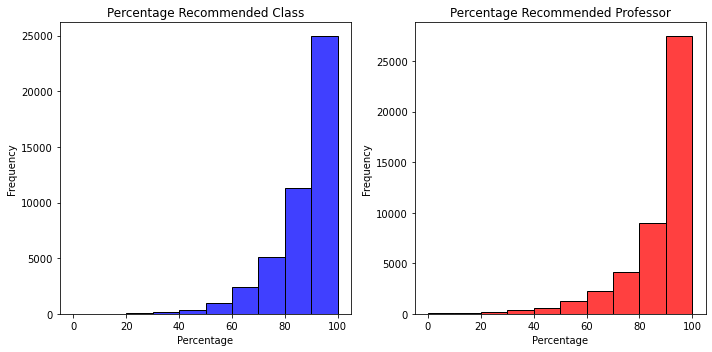

In [33]:
# histogram size
plt.figure(figsize=(10, 5))

# histogram for Percentage Recommended Class
plt.subplot(1, 2, 1)
sns.histplot(capes['Percentage Recommended Class'], bins=10, color='blue')
plt.title('Percentage Recommended Class')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

# histogram for Percentage Recommended Professor
plt.subplot(1, 2, 2)
sns.histplot(capes['Percentage Recommended Professor'], bins=10, color='red')
plt.title('Percentage Recommended Professor')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

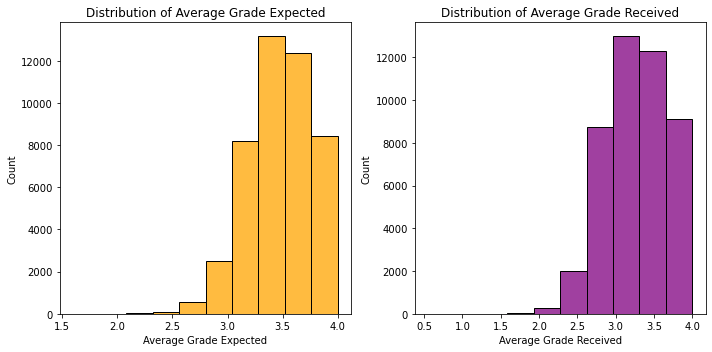

In [34]:
# histogram size
plt.figure(figsize=(10, 5))

# Histogram for Average Grade Expected
plt.subplot(1, 2, 1)
sns.histplot(capes['Average Grade Expected'], bins=10, color='orange')
plt.title('Distribution of Average Grade Expected')

# Histogram for Average Grade Received
plt.subplot(1, 2, 2)
sns.histplot(capes['Average Grade Received'], bins=10, color='purple')
plt.title('Distribution of Average Grade Received')

plt.tight_layout()
plt.show()

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [35]:
### Section 3 of EDA if you need it  - please give it a better title than this

<Figure size 720x576 with 0 Axes>

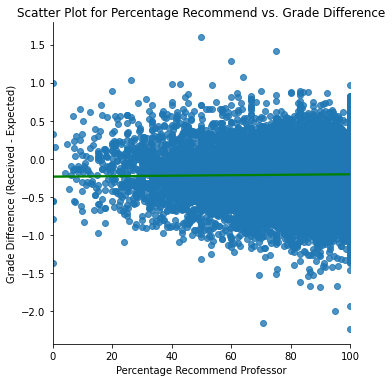

In [44]:
# Scatter plot for Percentage Recommend vs. Grade Difference
plt.figure(figsize=(10, 8))
sns.lmplot(x='Percentage Recommended Professor', y='Difference', data=capes, line_kws={'color': 'green'})
plt.title('Scatter Plot for Percentage Recommend vs. Grade Difference')
plt.xlabel('Percentage Recommend Professor')
plt.ylabel('Grade Difference (Received - Expected)')
plt.show()

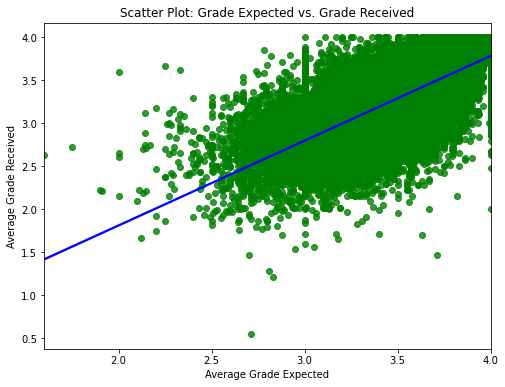

In [46]:
# Scatter plot for Grade Expected vs. Grade Received
plt.figure(figsize=(8, 6))
sns.regplot(x='Average Grade Expected', y='Average Grade Received', data=capes, color='green', line_kws={'color': 'blue'})
plt.title('Scatter Plot: Grade Expected vs. Grade Received')
plt.show()

In [58]:
### Section 3 of EDA if you need it  - please give it a better title than this

<Figure size 360x288 with 0 Axes>

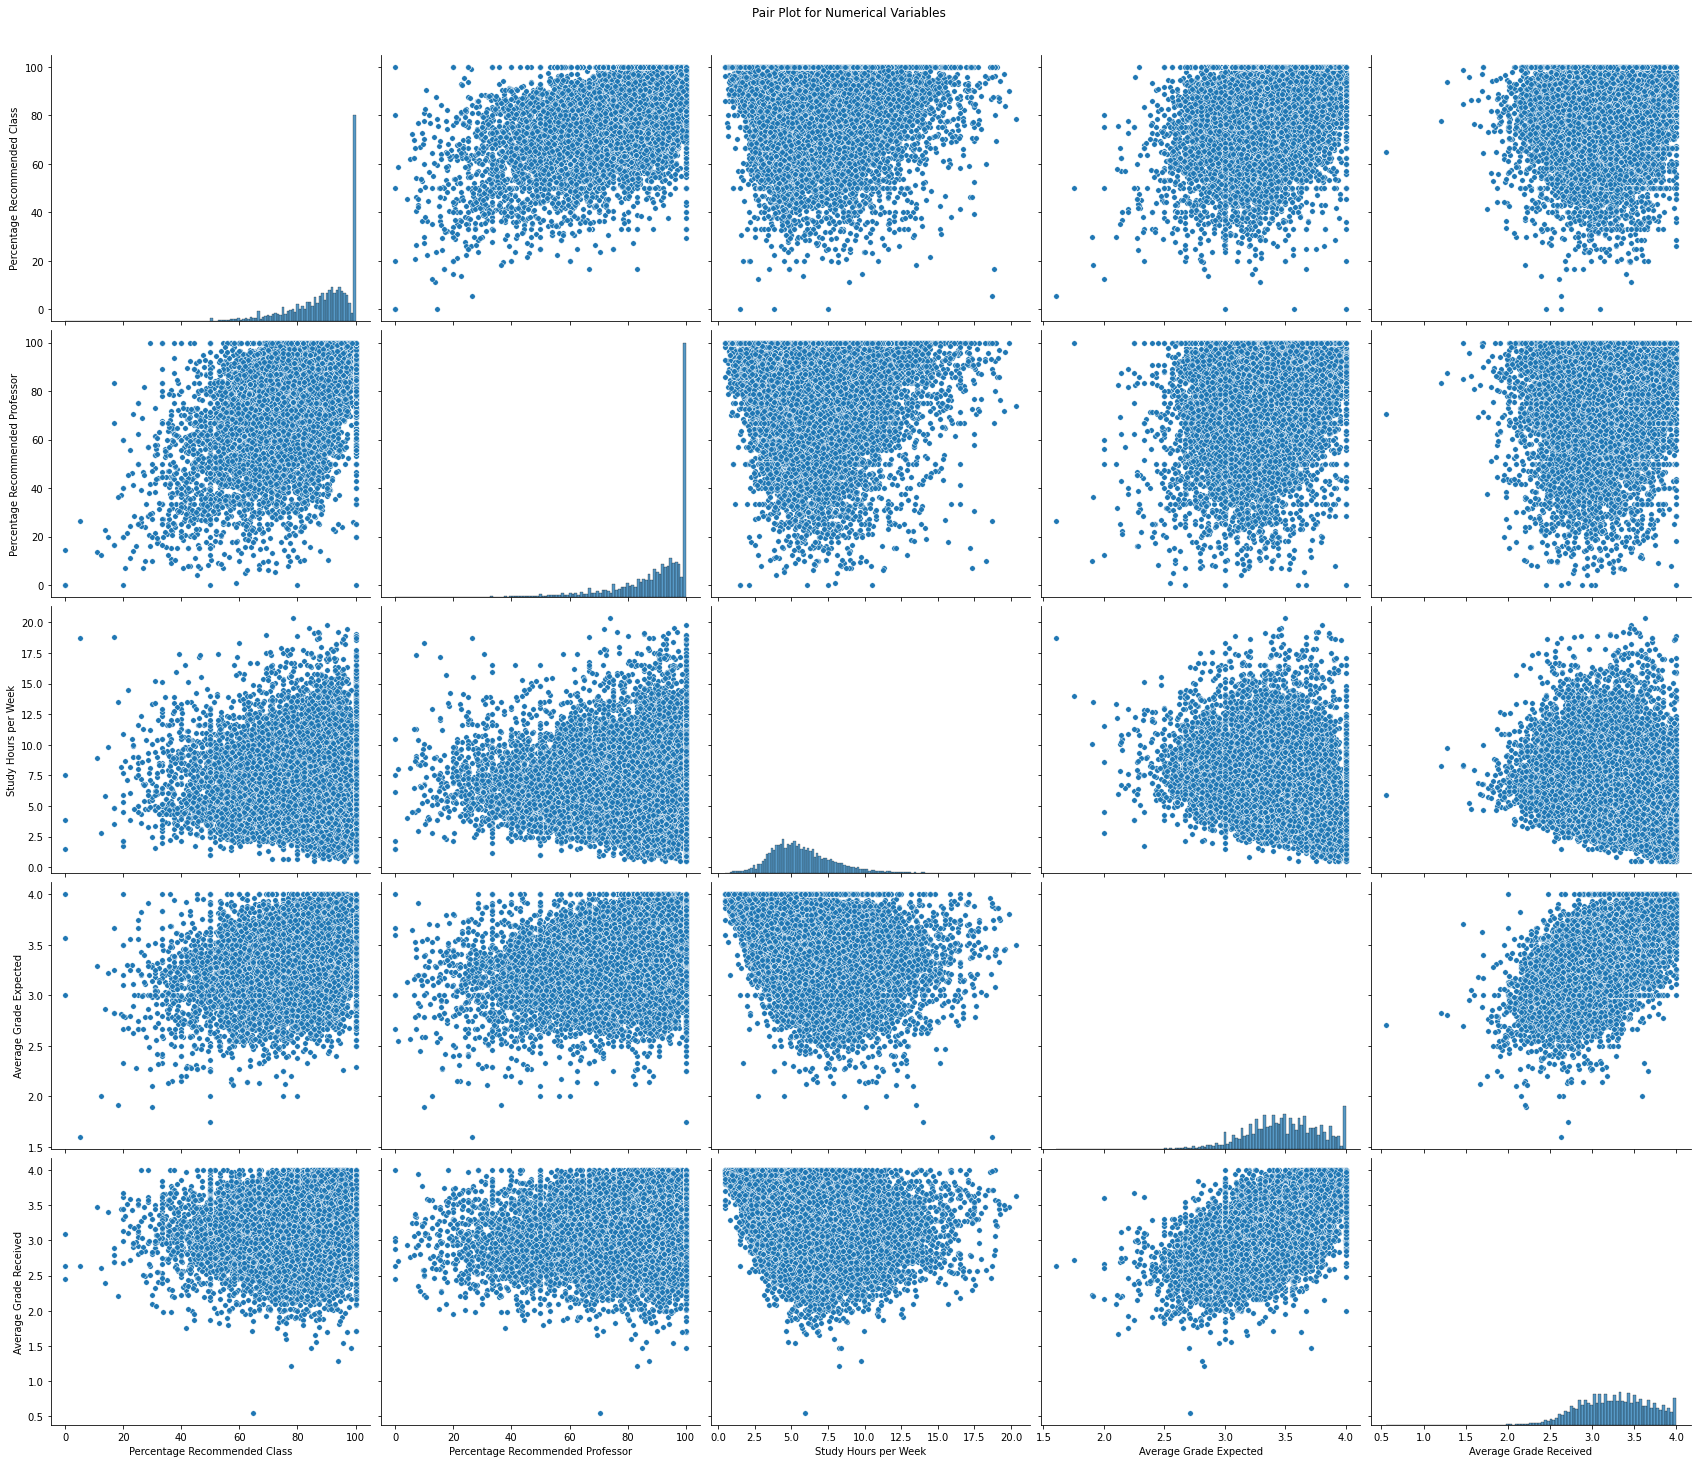

In [59]:
columns = ['Percentage Recommended Class', 'Percentage Recommended Professor', 'Study Hours per Week','Average Grade Expected', 'Average Grade Received']
plt.figure(figsize=(5, 4))
sns.pairplot(capes[columns], plot_kws={'s': 30}, height=4, aspect=1.2)
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |